In [4]:
import sklearn
import numpy as np
from sklearn import preprocessing
import xgboost as xgb
import h5py
from sklearn.metrics import mean_squared_error
import pandas as pd
import math
from matplotlib import pyplot as plt
fname = '../data/TaxiBJ/BJ{}_M32x32_T30_InOut.h5'.format(16)
reader=h5py.File(fname,'r')
data=reader['data'].value
date=reader['date'].value

c:\users\hu\miniconda3\envs\pytorch11\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
import os
os.path.abspath('..')

'C:\\Users\\hu\\PycharmProjects\\DeepST-Pytorch'

In [6]:
train_data_all=[]
for timeslot in data:
    train_data_all.append(timeslot[0][15][10])


In [7]:
print(len(train_data_all))

7220


In [8]:
x_train=[]
y_train=[]
for i in range(7000):
    x_train.append(train_data_all[i:i+48])
    y_train.append(train_data_all[i+49])
print(len(x_train),len(y_train))

7000 7000


In [9]:
minmaxx=preprocessing.MinMaxScaler()
minmaxy=preprocessing.MinMaxScaler()
x_train=minmaxx.fit_transform(x_train)
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_train=minmaxy.fit_transform(y_train)

In [10]:
y_train.shape

(7000, 1)

In [11]:
model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=False, objective='reg:gamma')
model.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=160, n_jobs=1,
       nthread=None, objective='reg:gamma', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=1)

In [9]:
plt.plot([i for i in range(len(x_train))],minmaxy.inverse_transform(np.array(model.predict(x_train)).reshape(-1,1)))

array([0.73997676, 0.7278087 , 0.7164407 , ..., 0.6151742 , 0.681444  ,
       0.6977653 ], dtype=float32)

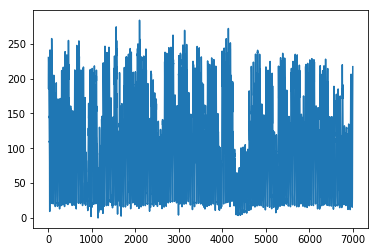

In [12]:
plt.plot([i for i in range(len(x_train))],minmaxy.inverse_transform(np.array(model.predict(x_train)).reshape(-1,1)))

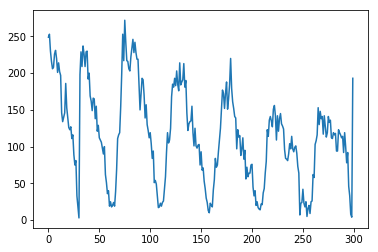

In [29]:
plt.plot([i for i in range(300)],minmaxy.inverse_transform(np.array(y_train).reshape(-1,1)[0:300]))
plt.savefig('../extra/300shortterm.svg')

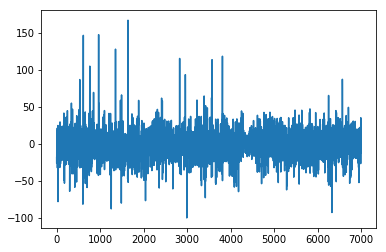

In [37]:
leng=7000
plt.plot([i for i in range(leng)],minmaxy.inverse_transform(np.array(model.predict(x_train)).reshape(-1,1))[0:leng]-minmaxy.inverse_transform(np.array(y_train).reshape(-1,1)[0:leng]))
plt.savefig('../extra/xgboost7000error.svg')

In [14]:
minmaxy.inverse_transform(np.array(model.predict(x_train)).reshape(-1,1))

array([[230.13277],
       [226.34851],
       [222.81305],
       ...,
       [191.31917],
       [211.92908],
       [217.005  ]], dtype=float32)

In [18]:
minmaxy.inverse_transform(np.array(model.predict(x_train)).reshape(-1,1))-minmaxy.inverse_transform(np.array(y_train).reshape(-1,1))

array([[-18.86723328],
       [-26.65148926],
       [ -7.18695068],
       ...,
       [-10.68083191],
       [ 15.92907715],
       [-12.99499512]])

In [21]:
predict=minmaxy.inverse_transform(np.array(model.predict(x_train)).reshape(-1,1))
true=minmaxy.inverse_transform(np.array(y_train).reshape(-1,1))
e=0
for i in range(len(predict)):
    e+=np.hypot(predict[i],true[i])
print("average error: ",e/len(predict))

average error:  [154.15278217]
